<a href="https://colab.research.google.com/github/RTae/AI102/blob/master/week1/AI102_Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Neartest Neighbor : Classification**

**From Scratch**

In [0]:
#import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files 
import io


In [0]:
# write Fuction

def minmax4norm(Data):
  _min = Data.min(axis = 0,keepdims = True)
  _max = Data.max(axis = 0,keepdims = True)

  return _min,_max

def minmaxNorm(Data,_min,_max):
  x_norm = (Data - _min)/(_max - _min)

  return x_norm

def KNN_Dis(X_Train,X_Vaild):
  all_dis = []

  for X_V in X_Vaild:
    dis = ((X_Train - X_V)**2).sum(axis = 1)
    dis = np.sqrt(dis)
    all_dis.append(dis)
  return (np.array(all_dis))

def KNN_Sort(Y_Train,all_dis):
  all_sorted_traget = []
  for dis in all_dis:
    sorted_target = Y_Train[dis.argsort()]
    all_sorted_traget.append(sorted_target)
  return np.array(all_sorted_traget)

def KNN_FindClass(all_sorted_traget,K):
  all_class = []
  for sorted_target in all_sorted_traget:
    unique, count_unique = np.unique(sorted_target[:K, :],return_counts=True)
    _class = unique[count_unique.argmax()]
    all_class.append(_class)
  return np.array(all_class).reshape(-1,1)

def KNN_findError_all(Y_Vaild,all_sorted_traget,min_K,max_K):
  error_list = []
  K_list = [i for i in range(min_K,max_K+1)]
  for K in K_list:
    Yhat = KNN_FindClass(all_sorted_traget,K)
    K_error = find_error_classification_onces(Y_Vaild,Yhat)
    error_list.append(K_error)
  return error_list,K_list

def find_error_classification_onces(Y, Yhat):
    N = Y.shape[0]
    error = (100/N)*(Y != Yhat).sum()
    return error

def KNN_best_K(K_list,error_list):
  K_list = np.array(K_list)
  error_list = np.array(error_list)
  plt.plot(K_list,error_list)
  plt.xlabel('K'),
  plt.ylabel('Error')

  sorted_K = K_list[error_list.argsort()]
  error_list.sort()
  best_K = sorted_K[0]
  print(best_K)
  print()
  for i in range(len(K_list)):
    print('K : ',sorted_K[i],', error : ',error_list[i])
  return best_K

def KNNC_FIT(X_train,Y_train,X_Vaild,Y_Vaild,min_K,max_K):
  min_Train,max_Train = minmax4norm(X_Train)
  X_norm_Train = minmaxNorm(X_Train,min_Train,max_Train)
  X_norm_Vaild = minmaxNorm(X_Vaild,min_Train,max_Train)
  dis = KNN_Dis(X_norm_Train,X_norm_Vaild)
  Sorted_Target = KNN_Sort(Y_Train,dis)
  error,K_list = KNN_findError_all(Y_Vaild,Sorted_Target,min_K,max_K)
  best_K = KNN_best_K(K_list, error)

  return best_K

def KNNC_Predict(X_Train,Y_Train,X_Test,bestK):
  min_Train,max_Train = minmax4norm(X_Train)
  X_norm_Train = minmaxNorm(X_Train,min_Train,max_Train)
  X_norm_Test = minmaxNorm(X_Test,min_Train,max_Train)
  dis = KNN_Dis(X_norm_Train,X_norm_Test)
  Sorted_Target = KNN_Sort(Y_Train,dis)
  Yhat = KNN_FindClass(Sorted_Target,bestK)

  return Yhat

Example I : SET50 Data

In [14]:
# Prepare data
from google.colab import files
uploaded = files.upload()

Saving SET50_D1_Dataset_Classification.xlsx to SET50_D1_Dataset_Classification (1).xlsx


In [0]:
data = pd.read_excel((uploaded['SET50_D1_Dataset_Classification.xlsx']),usecols = 'G:AK')

In [16]:
data

,Delta30,Delta29,Delta28,Delta27,Delta26,Delta25,Delta24,Delta23,Delta22,Delta21,Delta20,Delta19,Delta18,Delta17,Delta16,Delta15,Delta14,Delta13,Delta12,Delta11,Delta10,Delta9,Delta8,Delta7,Delta6,Delta5,Delta4,Delta3,Delta2,Delta1,Target
0,12.00,-2.00,-15.97,-0.88,-8.15,-8.13,-14.22,10.36,14.63,-8.69,19.29,-0.82,-3.95,-12.61,4.80,9.69,2.88,-7.33,-16.43,-6.43,-5.53,10.00,-2.70,-11.77,7.83,2.38,-27.98,-22.08,-37.88,33.37,Down
1,-2.00,-15.97,-0.88,-8.15,-8.13,-14.22,10.36,14.63,-8.69,19.29,-0.82,-3.95,-12.61,4.80,9.69,2.88,-7.33,-16.43,-6.43,-5.53,10.00,-2.70,-11.77,7.83,2.38,-27.98,-22.08,-37.88,33.37,-12.91,Up
2,-15.97,-0.88,-8.15,-8.13,-14.22,10.36,14.63,-8.69,19.29,-0.82,-3.95,-12.61,4.80,9.69,2.88,-7.33,-16.43,-6.43,-5.53,10.00,-2.70,-11.77,7.83,2.38,-27.98,-22.08,-37.88,33.37,-12.91,-4.94,Down
3,-0.88,-8.15,-8.13,-14.22,10.36,14.63,-8.69,19.29,-0.82,-3.95,-12.61,4.80,9.69,2.88,-7.33,-16.43,-6.43,-5.53,10.00,-2.70,-11.77,7.83,2.38,-27.98,-22.08,-37.88,33.37,-12.91,-4.94,-8.36,Down
4,-8.15,-8.13,-14.22,10.36,14.63,-8.69,19.29,-0.82,-3.95,-12.61,4.80,9.69,2.88,-7.33,-16.43,-6.43,-5.53,10.00,-2.70,-11.77,7.83,2.38,-27.98,-22.08,-37.88,33.37,-12.91,-4.94,-8.36,-34.40,Down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,5.24,-0.33,1.03,-1.87,-3.72,13.85,17.74,9.41,-2.18,-0.48,3.75,-0.56,7.19,-1.51,8.94,-7.16,2.14,-10.69,4.20,-2.72,-8.88,14.41,-0.89,-7.12,-0.48,-3.84,1.61,7.53,-7.23,-1.11,Down
1913,-0.33,1.03,-1.87,-3.72,13.85,17.74,9.41,-2.18,-0.48,3.75,-0.56,7.19,-1.51,8.94,-7.16,2.14,-10.69,4.20,-2.72,-8.88,14.41,-0.89,-7.12,-0.48,-3.84,1.61,7.53,-7.23,-1.11,-1.25,Up
1914,1.03,-1.87,-3.72,13.85,17.74,9.41,-2.18,-0.48,3.75,-0.56,7.19,-1.51,8.94,-7.16,2.14,-10.69,4.20,-2.72,-8.88,14.41,-0.89,-7.12,-0.48,-3.84,1.61,7.53,-7.23,-1.11,-1.25,3.14,Down
1915,-1.87,-3.72,13.85,17.74,9.41,-2.18,-0.48,3.75,-0.56,7.19,-1.51,8.94,-7.16,2.14,-10.69,4.20,-2.72,-8.88,14.41,-0.89,-7.12,-0.48,-3.84,1.61,7.53,-7.23,-1.11,-1.25,3.14,-10.04,Down


In [0]:
DataMatrix = data.values

In [18]:
DataMatrix.shape

(1917, 31)

In [0]:
D = DataMatrix.shape[-1]-1
X = DataMatrix[:, :D]
X = np.array(X, dtype=np.float32)
Y = DataMatrix[:, D:]

X_Train = X[:-300,:]
Y_Train = Y[:-300,:]
X_Vaild = X[-300:-150,:]
Y_Vaild = Y[-300:-150,:]
X_Test = X[-150:,:]
Y_Test = Y[-150:,:]


10

K :  10 , error :  42.666666666666664
K :  9 , error :  42.666666666666664
K :  3 , error :  43.33333333333333
K :  6 , error :  44.0
K :  7 , error :  44.0
K :  5 , error :  44.666666666666664
K :  16 , error :  44.666666666666664
K :  2 , error :  45.33333333333333
K :  12 , error :  46.666666666666664
K :  26 , error :  46.666666666666664
K :  28 , error :  47.33333333333333
K :  8 , error :  47.33333333333333
K :  22 , error :  47.33333333333333
K :  18 , error :  48.0
K :  19 , error :  48.666666666666664
K :  11 , error :  48.666666666666664
K :  20 , error :  49.33333333333333
K :  27 , error :  49.33333333333333
K :  15 , error :  49.33333333333333
K :  30 , error :  49.33333333333333
K :  29 , error :  49.33333333333333
K :  24 , error :  50.0
K :  14 , error :  50.0
K :  4 , error :  50.0
K :  21 , error :  50.666666666666664
K :  17 , error :  50.666666666666664
K :  23 , error :  52.0
K :  13 , error :  52.0
K :  25 , error :  52.666666666666664
K :  1 , error :  52.666

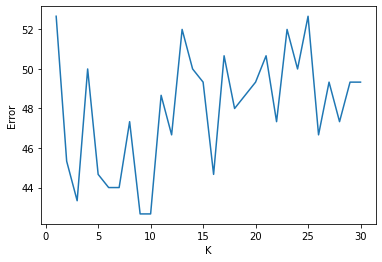

In [20]:
#Learning

best_K = KNNC_FIT(X_Train,Y_Train,X_Vaild,Y_Vaild,1,30)

In [21]:
#Predicts

Yhat = KNNC_Predict(X_Train,Y_Train,X_Test,best_K)
error = find_error_classification_onces(Y_Test,Yhat)
print('Error : ' + str(error) + ' %')

Error : 45.33333333333333 %


Example II : EURUSD Data

In [22]:
# Prepare data

uploaded = files.upload()

Saving EURUSD_D1_Dataset_Classification.xlsx to EURUSD_D1_Dataset_Classification.xlsx


In [0]:
data = pd.read_excel((uploaded['EURUSD_D1_Dataset_Classification.xlsx']),usecols = 'G:AK')

In [27]:
data

,Delta30,Delta29,Delta28,Delta27,Delta26,Delta25,Delta24,Delta23,Delta22,Delta21,Delta20,Delta19,Delta18,Delta17,Delta16,Delta15,Delta14,Delta13,Delta12,Delta11,Delta10,Delta9,Delta8,Delta7,Delta6,Delta5,Delta4,Delta3,Delta2,Delta1,Target
0,0.00930,-0.02400,0.02300,0.00750,-0.00010,-0.01060,-0.00320,-0.00730,0.01590,-0.00090,0.00050,-0.01000,0.00030,-0.00630,0.00700,-0.00850,-0.00020,0.00470,-0.00250,-0.01480,0.00240,0.00030,0.00030,-0.00780,0.00970,0.01020,0.00150,-0.00250,0.00050,0.00140,Down
1,-0.02400,0.02300,0.00750,-0.00010,-0.01060,-0.00320,-0.00730,0.01590,-0.00090,0.00050,-0.01000,0.00030,-0.00630,0.00700,-0.00850,-0.00020,0.00470,-0.00250,-0.01480,0.00240,0.00030,0.00030,-0.00780,0.00970,0.01020,0.00150,-0.00250,0.00050,0.00140,-0.00610,Down
2,0.02300,0.00750,-0.00010,-0.01060,-0.00320,-0.00730,0.01590,-0.00090,0.00050,-0.01000,0.00030,-0.00630,0.00700,-0.00850,-0.00020,0.00470,-0.00250,-0.01480,0.00240,0.00030,0.00030,-0.00780,0.00970,0.01020,0.00150,-0.00250,0.00050,0.00140,-0.00610,-0.00320,Down
3,0.00750,-0.00010,-0.01060,-0.00320,-0.00730,0.01590,-0.00090,0.00050,-0.01000,0.00030,-0.00630,0.00700,-0.00850,-0.00020,0.00470,-0.00250,-0.01480,0.00240,0.00030,0.00030,-0.00780,0.00970,0.01020,0.00150,-0.00250,0.00050,0.00140,-0.00610,-0.00320,-0.01060,Up
4,-0.00010,-0.01060,-0.00320,-0.00730,0.01590,-0.00090,0.00050,-0.01000,0.00030,-0.00630,0.00700,-0.00850,-0.00020,0.00470,-0.00250,-0.01480,0.00240,0.00030,0.00030,-0.00780,0.00970,0.01020,0.00150,-0.00250,0.00050,0.00140,-0.00610,-0.00320,-0.01060,0.00740,Down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5338,-0.00386,-0.00105,-0.00660,0.00072,-0.00236,0.00322,0.00650,0.00774,0.00296,-0.00316,0.00017,0.00007,0.00004,-0.00845,0.00011,-0.00084,0.00065,-0.00582,-0.00118,-0.00068,0.00429,0.00042,0.00155,-0.00123,-0.00484,0.00155,0.00520,-0.00569,-0.00116,-0.00575,Down
5339,-0.00105,-0.00660,0.00072,-0.00236,0.00322,0.00650,0.00774,0.00296,-0.00316,0.00017,0.00007,0.00004,-0.00845,0.00011,-0.00084,0.00065,-0.00582,-0.00118,-0.00068,0.00429,0.00042,0.00155,-0.00123,-0.00484,0.00155,0.00520,-0.00569,-0.00116,-0.00575,-0.00118,Up
5340,-0.00660,0.00072,-0.00236,0.00322,0.00650,0.00774,0.00296,-0.00316,0.00017,0.00007,0.00004,-0.00845,0.00011,-0.00084,0.00065,-0.00582,-0.00118,-0.00068,0.00429,0.00042,0.00155,-0.00123,-0.00484,0.00155,0.00520,-0.00569,-0.00116,-0.00575,-0.00118,0.00071,Down
5341,0.00072,-0.00236,0.00322,0.00650,0.00774,0.00296,-0.00316,0.00017,0.00007,0.00004,-0.00845,0.00011,-0.00084,0.00065,-0.00582,-0.00118,-0.00068,0.00429,0.00042,0.00155,-0.00123,-0.00484,0.00155,0.00520,-0.00569,-0.00116,-0.00575,-0.00118,0.00071,-0.00194,Up


In [0]:
DataMatrix = data.values

In [29]:
DataMatrix.shape

(5343, 31)

In [0]:
D = DataMatrix.shape[-1]-1
X = DataMatrix[:, :D]
X = np.array(X, dtype=np.float32)
Y = DataMatrix[:, D:]

X_Train = X[3000:-100,:]
Y_Train = Y[3000:-100,:]
X_Vaild = X[-100:-50,:]
Y_Vaild = Y[-100:-50,:]
X_Test = X[-50:,:]
Y_Test = Y[-50:,:]

5

K :  5 , error :  40.0
K :  23 , error :  40.0
K :  1 , error :  42.0
K :  25 , error :  42.0
K :  22 , error :  42.0
K :  21 , error :  42.0
K :  2 , error :  44.0
K :  3 , error :  44.0
K :  24 , error :  44.0
K :  20 , error :  44.0
K :  19 , error :  44.0
K :  28 , error :  46.0
K :  27 , error :  46.0
K :  26 , error :  46.0
K :  18 , error :  46.0
K :  30 , error :  46.0
K :  29 , error :  46.0
K :  6 , error :  46.0
K :  4 , error :  46.0
K :  17 , error :  48.0
K :  8 , error :  48.0
K :  7 , error :  48.0
K :  16 , error :  48.0
K :  9 , error :  50.0
K :  15 , error :  50.0
K :  12 , error :  52.0
K :  11 , error :  52.0
K :  10 , error :  52.0
K :  14 , error :  54.0
K :  13 , error :  54.0


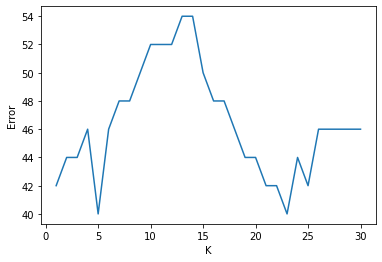

In [32]:
best_K = KNNC_FIT(X_Train,Y_Train,X_Vaild,Y_Vaild,1,30)

In [33]:
#Predicts

Yhat = KNNC_Predict(X_Train,Y_Train,X_Test,best_K)
error = find_error_classification_onces(Y_Test,Yhat)
print('Error : ' + str(error) + ' %')

Error : 58.0 %


# **K-Neartest Neighbor : Regression**

{'SET50_D1_Dataset_Classification.xlsx': b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\x00a]I:O\x01\x00\x00\x8f\x04\x00\x00\x13\x00\x00\x00[Content_Types].xml\xad\x94\xcbn\xc20\x10E\xf7\xfd\x8a\xc8\xdb*1tQU\x15\x81E\x1f\xcb\x16\xa9\xf4\x03\\{B,\x1c\xdb\xf2\x0c\x14\xfe\xbe\x93\xf0P[Q\xa0\x82M\xacd\xee\xdcs\xc7\x8e<\x18-\x1b\x97- \xa1\r\xbe\x14\xfd\xa2\'2\xf0:\x18\xeb\xa7\xa5x\x9f<\xe7w"CR\xde(\x17<\x94b\x05(F\xc3\xab\xc1d\x15\x013n\xf6X\x8a\x9a(\xdeK\x89\xba\x86Fa\x11"x\xaeT!5\x8a\xf85MeTz\xa6\xa6 oz\xbd[\xa9\x83\'\xf0\x94S\xeb!\x86\x83G\xa8\xd4\xdcQ\xf6\xb4\xe4\xcf\xeb \t\x1c\x8a\xeca-lY\xa5P1:\xab\x15q].\xbc\xf9E\xc97\x84\x82;;\r\xd66\xe25\x0b\x84\xdcKh+\x7f\x036}\xaf\xbc3\xc9\x1a\xc8\xc6*\xd1\x8bjX%M\xd0\xe3\x14"J\xd6\x17\x87]\xf6\xc4\x0cUe5\xb0\xc7\xbc\xe1\x96\x02\xda@\x06L\x1e\xd9\x12\x12Y\xd8e>\xc8\xd6!\xc1\xff\xe1\xdb=j\xbbO$.\x9dDZ9\xc0\xb3G\xc5\x98@\x19\xac\x01\xa8q\xc5\xda\xf4\x08\x99\xf8\x7f\x82\xf5\xb3\x7f6\xbf\xb39\x02\xfc\x0ci\xf6\x11\xc2\xec\xd2\xc3\xb6k\xd1(\xebO\xe0wb\x